In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [50]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

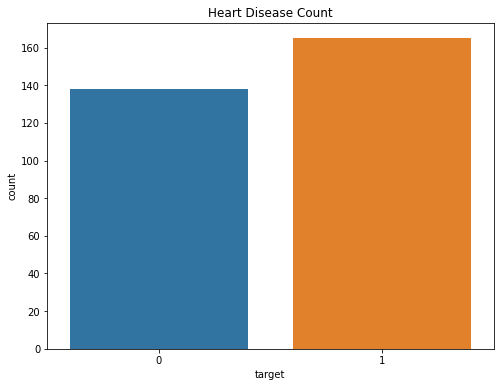

In [51]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = "target", data=df)
plt.title("Heart Disease Count")
plt.show()

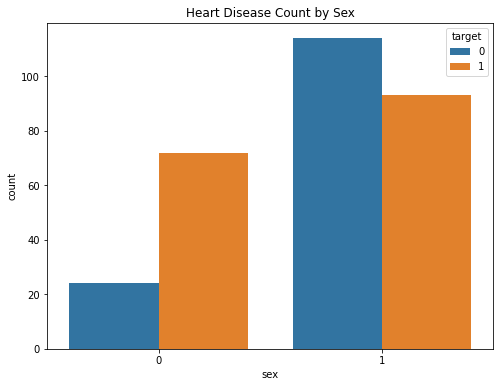

In [52]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.title("Heart Disease Count by Sex")
plt.show()

In [ ]:
df.groupby('sex')['target'].value_counts()

In [ ]:
df.loc[(df['sex'] == 1) & (df['target'] == 1)]

In [7]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)


(14.5, -0.5)

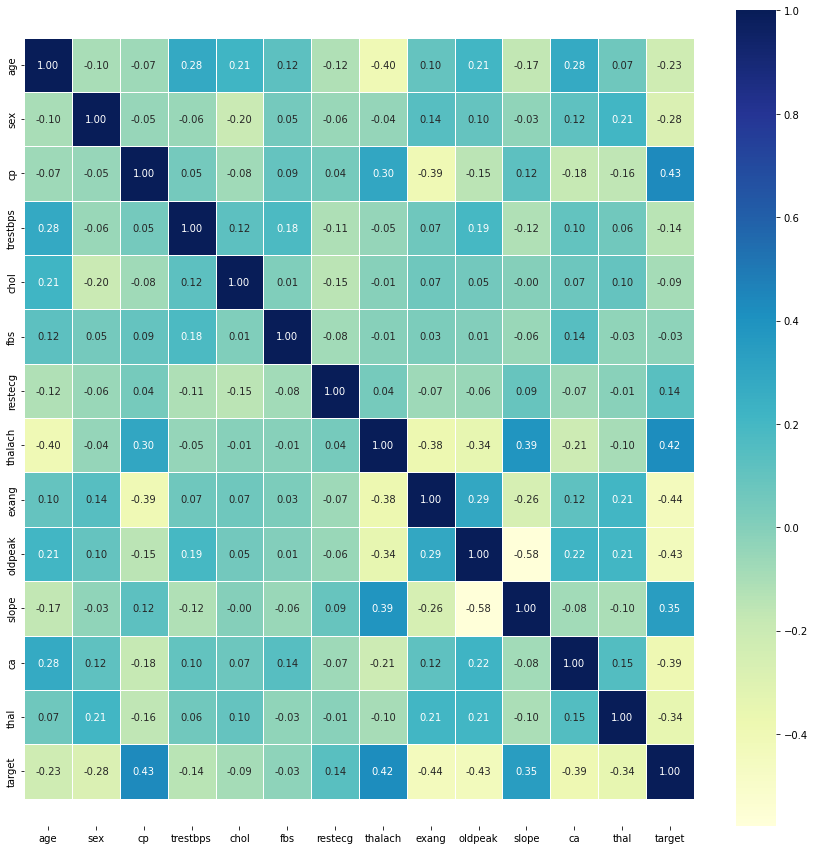

In [8]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [28]:
X, y = df.drop('target', axis=1), df.target

test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)

In [29]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2


In [32]:
model = LogisticRegression(solver="liblinear")
model

LogisticRegression(solver='liblinear')

In [33]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [34]:
model.score(X_train, y_train)

0.8773584905660378

In [38]:
model.intercept_

array([0.45270238])

In [40]:
model.coef_

array([[ 1.42762921e-02, -1.37754126e+00,  8.94648083e-01,
        -1.64493244e-02, -7.16121047e-04,  3.30660559e-01,
         2.94394293e-01,  2.94241457e-02, -8.76732337e-01,
        -7.13318482e-01,  4.50903902e-01, -6.33639442e-01,
        -9.97236018e-01]])

In [37]:
predicted = model.predict(X_test)
predicted

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [41]:
y_test.values

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [48]:
model.score(X_test, y_test)

0.7802197802197802